In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/equilibration/"
print("data path: ", data_path)

level: level2 & tutorial name: nanosheared-electrolyte
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/nanosheared-electrolyte/equilibration/


In [3]:
time, distance = np.loadtxt(data_path + "interwall_distance.dat").T
time /= 1000 # ps
distance /= 10 # nm

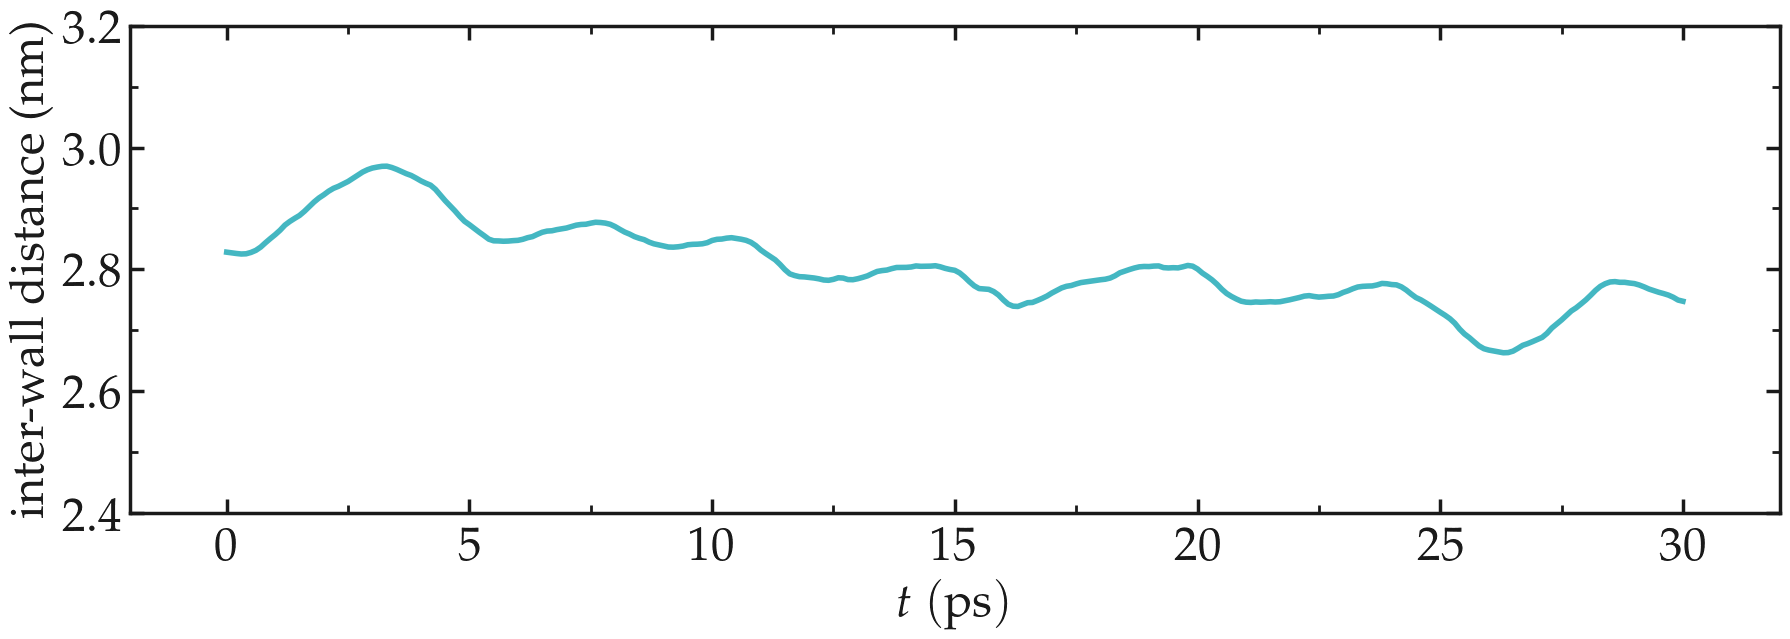

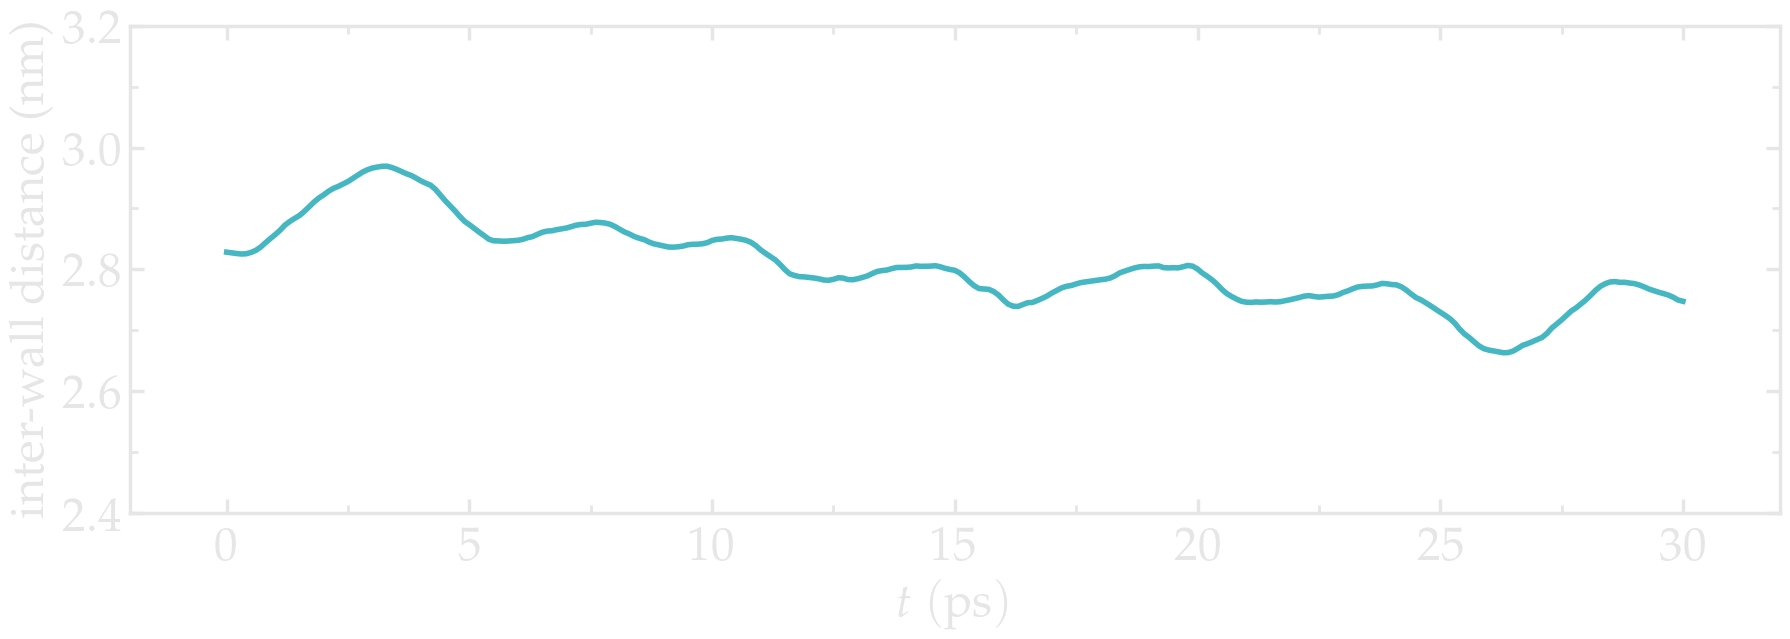

In [4]:
filename = "equilibration"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6.5), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=1)
    myplt.add_panel()
    myplt.add_plot(x = time, y = distance, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    myplt.complete_panel(ylabel = r'inter-wall distance (nm)', xlabel = r'$t ~ \mathrm{(ps)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 35, 5), x_boundaries=(-2, 32),
                   y_ticks=np.arange(2.4, 3.21, 0.2), y_boundaries=(2.4, 3.2))
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

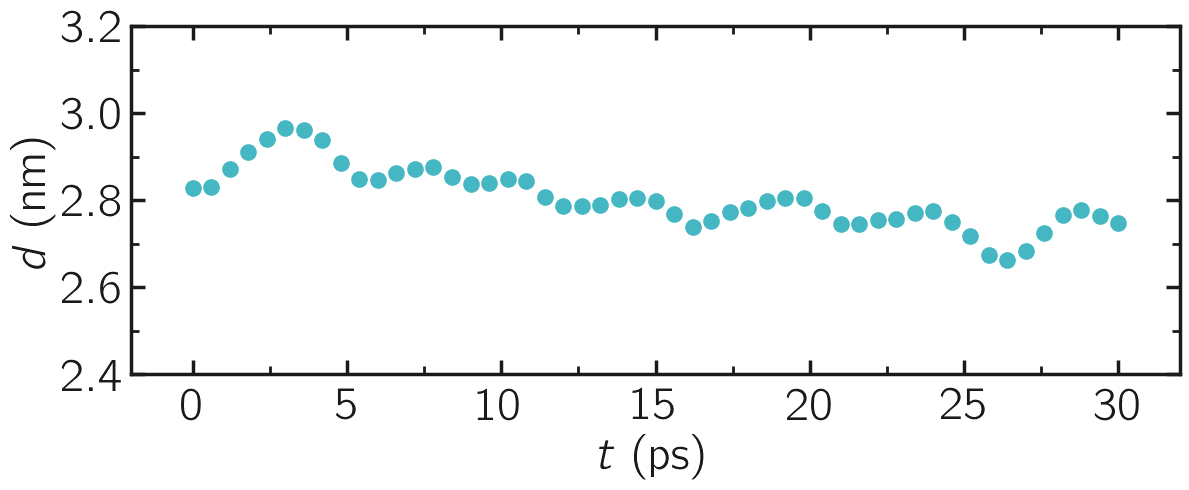

In [8]:
filename = "equilibration-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                    transparency = False, use_serif=False, n_line=1)
myplt.add_panel()
myplt.add_plot(x = time[::6], y = distance[::6], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
myplt.complete_panel(ylabel = r'$d ~ \mathrm{(nm)}$', xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 35, 5), x_boundaries=(-2, 32),
                y_ticks=np.arange(2.4, 3.21, 0.2), y_boundaries=(2.4, 3.2))
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')